In [ ]:
import numpy as np # linear algebra module
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re # used for regex
import seaborn as sns # data visualization module
from IPython.display import display
pd.options.mode.chained_assignment = None
import matplotlib
matplotlib.style.use('ggplot')

#Getting data
df = pd.read_csv('C:/Users/samarth.goel/Desktop/demonetization-tweets.csv', encoding = "ISO-8859-1")
display(df.head(5)) # used to display data

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [10]:


'''#TOTALLY DOUBTFUL ABOUT THIS ONE
import re
#Preprocessing del RT @-----:
df['text_new'] = ''
df['tweetos'] = '' 

#add tweetos first part
for i in range(len(df['text'])):
    try:
        df['tweetos'][i] = df['text'].str.split(':')[i][0]
    except AttributeError:    
        df['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(df['text'])):
    if df['tweetos'].str.contains('RT @')[i]  == False:
        df['tweetos'][i] = 'other'

#'text_new' is the feature 'text' without the tweetos    
for i in range(len(df['text'])):
    m = re.search('(?<=:)(.*)', df['text'][i])
    if df['text'].str.contains('RT @')[i]  == True:
        try:
            df['text_new'][i]=m.group(0)
        except AttributeError:
            df['text_new'][i]=df['text'][i] 
    else:       
         df['text_new'][i] =  df['text'][i]'''
import string,re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('brown')
#THE CLEANING FUNCTION
def clean_text(tweets):
    tweets = word_tokenize(tweets)#SEPERATE EACH WORD
    tweets = tweets[4:] #to remove RT@
    tweets= " ".join(tweets)#JOIN WORDS
    tweets=re.sub('demonetization','',tweets)#REMOVE UNWANTED TEXT WITH BLANK
    tweets=re.sub('Demonetization','',tweets)
    tweets=re.sub('ed','',tweets)
    tweets=re.sub('India','',tweets)
    tweets=re.sub('Modi','',tweets)
    tweets=re.sub('https','',tweets)
    tweets=re.sub('U00A0','',tweets)
    tweets=re.sub('Narendra','',tweets)
    tweets=re.sub('PM','',tweets)
    tweets=re.sub('U00BD','',tweets)
    tweets=re.sub('U00B8','',tweets)
    tweets = [char for char in tweets if char not in string.punctuation]#REMOVE PUNCTUATIONS 
    tweets = ''.join(tweets)#JOIN THE LETTERS
    tweets = [word for word in tweets.split() if word.lower() not in stopwords.words('english')]#REMOVE COMMON ENGLISH WORDS(I,YOU,WE...)
    return " ".join(tweets)

df['cleaned_text']=df['text'].apply(clean_text) #adding clean text to dataframe

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samarth.goel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\samarth.goel\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [5]:
display(df['cleaned_text'].head(5))

0    Critical question PayTM inform ict PM clearly ...
1                                      vote survey app
2    Former FinSec RBI Dy Governor CBDT Chair Harva...
3    Gurugram Haryana Post office employees provide...
4    Rdy Wding mailtoday cartoon RdyWding https tco...
Name: cleaned_text, dtype: object

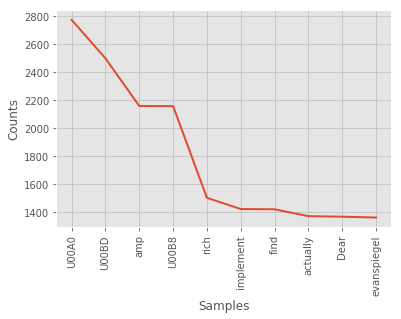

In [11]:
#chart to display most used words
from nltk.probability import FreqDist
clean_term = []
for terms in df['cleaned_text']:
    clean_term += terms.split(" ")
cleaned = FreqDist(clean_term)
cleaned.plot(10)

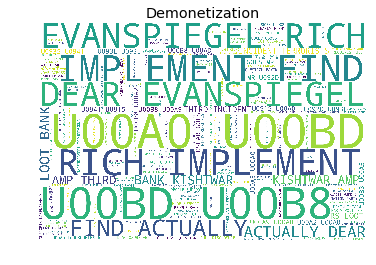

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt # creates a plotting area in a figure

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    #Narendra Modi is the Prime minister of India
    stopwords.add("lakh")
    wordcloud = WordCloud(width=4800, height=3200, background_color="white",stopwords=stopwords,random_state = 3016).generate(" ".join([i for i in tweets['cleaned_text'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off") # The Axes contains most of the figure elements: Axis , Tick , Line2D , Text , Polygon , etc., and sets the coordinate system
    plt.title("Demonetization")

wordcloud_by_province(df)  

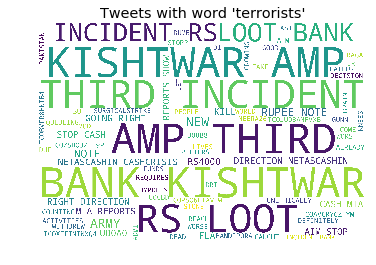

In [34]:
def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweets['text'].str.contains("terrorists").astype(int)) # Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).
    #print(a)
    b = list(a[a['text']==1].index.values)
    #print(b)
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("terrorists")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(width=4800, height=3200, background_color="white",stopwords=stopwords,random_state = 3016).generate(" ".join([i for i in tweets.loc[b,:]['cleaned_text'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'terrorists'")

wordcloud_by_province(df)  

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #  rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

df['sentiment_compound_polarity']=df.text.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.text.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.text.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_pos']=df.text.apply(lambda x:sid.polarity_scores(x)['pos'])
df['sentiment_type']=''
df.loc[df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
df.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,screenName,retweetCount,isRetweet,retweeted,cleaned_text,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,...,HASHTAGFARZIWAL,331,True,False,Critical question PayTM inform ict clearly fis...,0.1027,0.783,0.1,0.117,POSITIVE
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,...,PRAMODKAUSHIK9,66,True,False,vote survey app,0.0000,1.000,0.0,0.000,NEUTRAL
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,...,rahulja13034944,12,True,False,Former FinSec RBI Dy Governor CBDT Chair Harva...,0.0000,1.000,0.0,0.000,NEUTRAL
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,...,deeptiyvd,338,True,False,Gurugram Haryana Post office employees provide...,0.0000,1.000,0.0,0.000,NEUTRAL
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,...,CPIMBadli,120,True,False,Rdy Wding mailtoday cartoon RdyWding tcou7gLNr...,0.0000,1.000,0.0,0.000,NEUTRAL


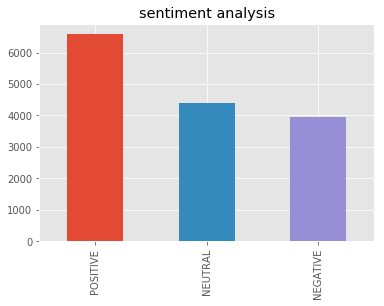

In [26]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")